In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from matplotlib.ticker import FuncFormatter



In [2]:
xls = pd.ExcelFile('/content/KPMG_VI_New_raw_data_update_final.xlsx')

In [279]:
Transactions = pd.read_excel(xls, 'Transactions',header=None)
NewCustomerList = pd.read_excel(xls, 'NewCustomerList',header=None)
CustomerDemographic = pd.read_excel(xls, 'CustomerDemographic',header=None)
CustomerAddress = pd.read_excel(xls, 'CustomerAddress',header=None)

In [280]:
Transactions.columns=Transactions.loc[1].values.tolist()
NewCustomerList.columns=NewCustomerList.loc[1].values.tolist()
CustomerDemographic.columns=CustomerDemographic.loc[1].values.tolist()
CustomerAddress.columns=CustomerAddress.loc[1].values.tolist()

Transactions.drop([0,1],inplace=True)
NewCustomerList.drop([0,1],inplace=True)
CustomerDemographic.drop([0,1],inplace=True)
CustomerAddress.drop([0,1],inplace=True)

In [281]:
NewCustomerList = NewCustomerList.loc[:, NewCustomerList.columns.notnull()]

#Data Analysis of transaction table

In [6]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
2,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
3,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
4,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
5,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
6,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [7]:
Transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,20000,0,2476,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [8]:
Transactions.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

#Data Anaysis with Customer Address Table


In [9]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
2,1,060 Morning Avenue,2016,New South Wales,Australia,10
3,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
4,4,0 Holy Cross Court,4211,QLD,Australia,9
5,5,17979 Del Mar Point,2448,New South Wales,Australia,4
6,6,9 Oakridge Court,3216,VIC,Australia,9


In [10]:
CustomerAddress.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,4003,3 Talisman Place,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


#Data Analysis of Customer Demographic

In [11]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
2,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
3,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
4,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
5,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
6,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [12]:
CustomerDemographic.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,3698,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,90,2,22
top,4000,Tobe,Pristnor,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,113,2024,235


In [13]:
CustomerDemographic.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

#Data Analysis with New Customer List table

In [282]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
2,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
3,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
4,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
5,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312
6,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.70312


In [283]:
NewCustomerList.describe()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
count,1000,971,1000,1000,983,894,835,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000.0000
unique,940,961,3,100,961,184,9,3,1,2,23,1000,522,3,1,16,324,324.0000
top,Mandie,Eade,Female,60,1955-11-25,Associate Professor,Financial Services,Mass Customer,N,No,9,193 North Point,2145,NSW,Australia,9,760,0.6375
freq,3,2,513,20,2,15,203,508,1000,507,79,1,9,506,1000,173,13,13.0000


In [481]:
#change DOB into age

today = datetime.date.today()
year = today.strftime("%Y")  
NewCustomerList["Age"] = 0
NewCustomerList.DOB.fillna('1955-11-25', inplace=True)

for i in range(1, len(NewCustomerList.DOB)+1):
  if i > 2:
    NewCustomerList.Age[i] = int(year)-int(str(NewCustomerList.DOB[i]).split('-')[0])

#change DOB into age

today = datetime.date.today()
year = today.strftime("%Y")  
CustomerDemographic["Age"] = 0
CustomerDemographic.DOB.fillna('1955-11-25', inplace=True)

for i in range(1, len(CustomerDemographic.DOB)+1):
  if i > 2:
    CustomerDemographic.Age[i] = int(year)-int(str(CustomerDemographic.DOB[i]).split('-')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [482]:
#convert age into backets
bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
NewCustomerList['AgeGroup'] = pd.cut(NewCustomerList['Age'], bins=bins, labels=labels, right=False)

#convert age into backets
bins= [0,10,20,30,40,50,60,70,80]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
CustomerDemographic['AgeGroup'] = pd.cut(CustomerDemographic['Age'], bins=bins, labels=labels, right=False)

In [483]:
NewCustomerList.head(4)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,AgeGroup
2,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,0,0-10
3,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,51,50-60
4,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875,47,40-50
5,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.70312,42,40-50


In [484]:
wealth_age=pd.DataFrame(index=['Mass Customer','High Net Worth','Affluent Customer'],columns=labels)
wealth_age.fillna(0, inplace=True)

wealth_age_old=pd.DataFrame(index=['Mass Customer','High Net Worth','Affluent Customer'],columns=labels)
wealth_age_old.fillna(0, inplace=True)

In [488]:
for name in ['Mass Customer','High Net Worth','Affluent Customer']:
  for label in labels:
    value = sum([i==j & i==True for i, j in zip(NewCustomerList.wealth_segment == name , NewCustomerList.AgeGroup == label)])
    wealth_age.loc[name,label] = value

for name in ['Mass Customer','High Net Worth','Affluent Customer']:
  for label in labels:
    value = sum([i==j & i==True for i, j in zip(CustomerDemographic.wealth_segment == name , CustomerDemographic.AgeGroup == label)])
    wealth_age_old.loc[name,label] = value


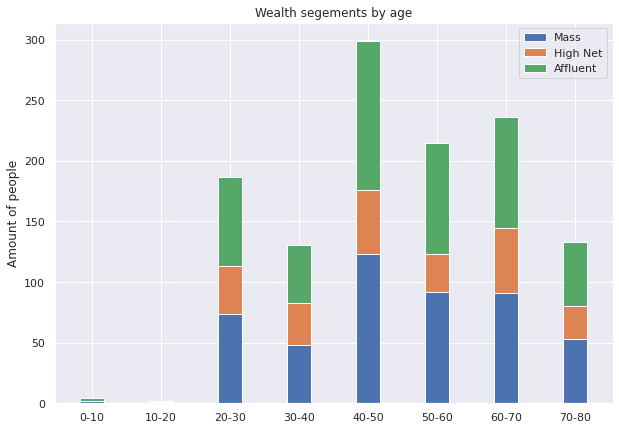

In [497]:
plt.figure(figsize=(10, 7))

N=8
bars = np.add(wealth_age.iloc[0].values.tolist(), wealth_age.iloc[1].values.tolist()).tolist()
r = [0,1,2,3,4,5,6,7,8,9]

ind   = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wealth_age.iloc[0].values.tolist(), width)
p2 = plt.bar(ind, wealth_age.iloc[1].values.tolist(), width,  bottom=wealth_age.iloc[0].values.tolist())
p3 = plt.bar(ind, wealth_age.iloc[0].values.tolist(), width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by age')
plt.xticks(ind, labels)
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()

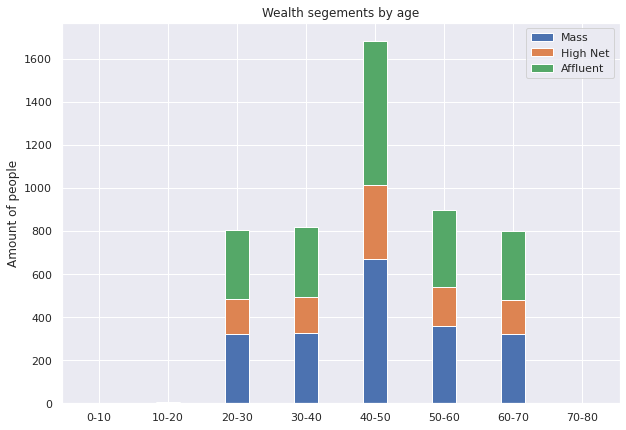

In [496]:
plt.figure(figsize=(10, 7))

N=8
bars = np.add(wealth_age_old.iloc[0].values.tolist(), wealth_age_old.iloc[1].values.tolist()).tolist()
r = [0,1,2,3,4,5,6,7,8,9]

ind   = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wealth_age_old.iloc[0].values.tolist(), width)
p2 = plt.bar(ind, wealth_age_old.iloc[1].values.tolist(), width,  bottom=wealth_age_old.iloc[0].values.tolist())
p3 = plt.bar(ind, wealth_age_old.iloc[0].values.tolist(), width,  bottom=bars)

plt.ylabel('Amount of people')
plt.title('Wealth segements by age')
plt.xticks(ind, labels)
plt.legend((p1[0], p2[0], p3[0]), ('Mass', 'High Net', 'Affluent'))

plt.show()

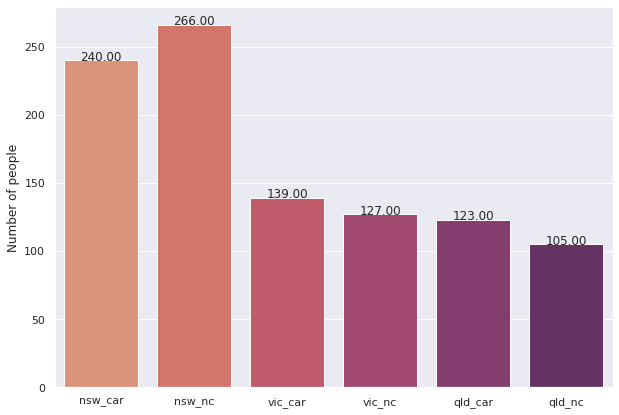

In [335]:
NewCustomerList["state"].value_counts()
nsw_car = 0
nsw_nc  = 0
vic_car = 0
vic_nc  = 0
qld_car = 0
qld_nc  = 0
idx     = 1
for es in NewCustomerList["state"]:
    if es == "NSW":
        if NewCustomerList["owns_car"][idx] == "Yes":
            nsw_car += 1
        else:
            nsw_nc  += 1
    elif es == "VIC":
        if NewCustomerList["owns_car"][idx] == "Yes":
            vic_car += 1
        else:
            vic_nc  += 1
    elif es == "QLD":
        if NewCustomerList["owns_car"][idx+2] == "Yes":
            qld_car += 1
        else:
            qld_nc  += 1
    idx += 1
            
x = np.arange(6)
graphgen = [nsw_car, nsw_nc, vic_car, vic_nc, qld_car, qld_nc]

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x=x,
    y=graphgen,
    palette='flare');

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")
plt.ylabel('Number of people')
plt.xticks(x, ('nsw_car', "nsw_nc", 'vic_car', "vic_nc", 'qld_car', "qld_nc"))
plt.show()

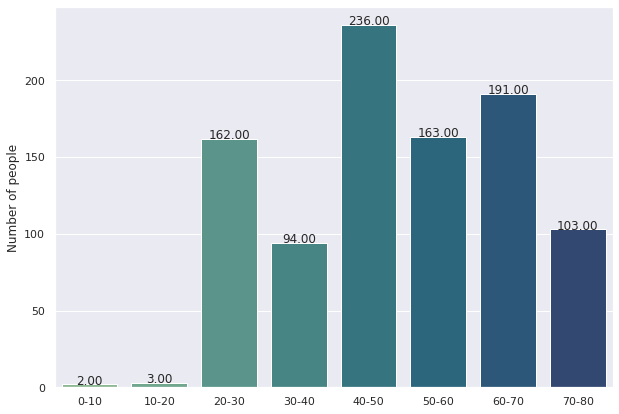

In [333]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax=sns.barplot(
    x=NewCustomerList.AgeGroup.value_counts().index,
    y=NewCustomerList.AgeGroup.value_counts(),
    data=NewCustomerList, 
    palette='crest');

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")
plt.ylabel('Number of people')
plt.show()

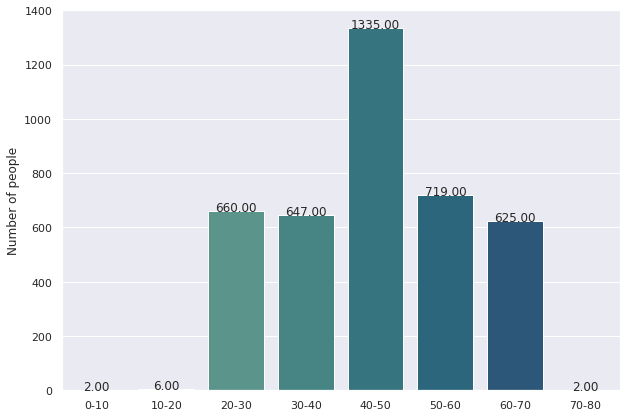

In [495]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax=sns.barplot(
    x=CustomerDemographic.AgeGroup.value_counts().index,
    y=CustomerDemographic.AgeGroup.value_counts(),
    data=CustomerDemographic, 
    palette='crest');

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")
plt.ylabel('Number of people')
plt.show()

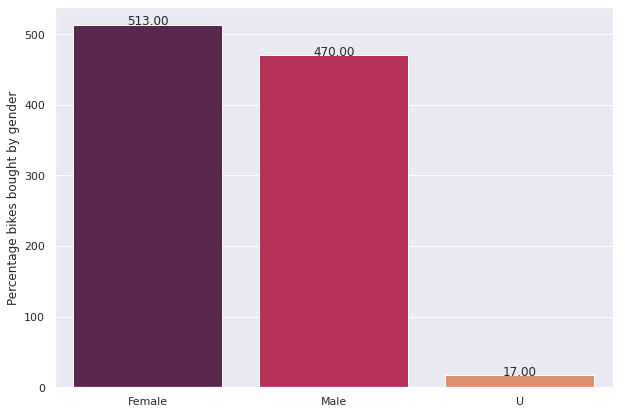

In [494]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax=sns.barplot(
    x=NewCustomerList.gender.value_counts().index,
    y=NewCustomerList.gender.value_counts(),
    data=NewCustomerList, 
    palette="rocket");

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")

plt.ylabel('Percentage bikes bought by gender')
plt.show()

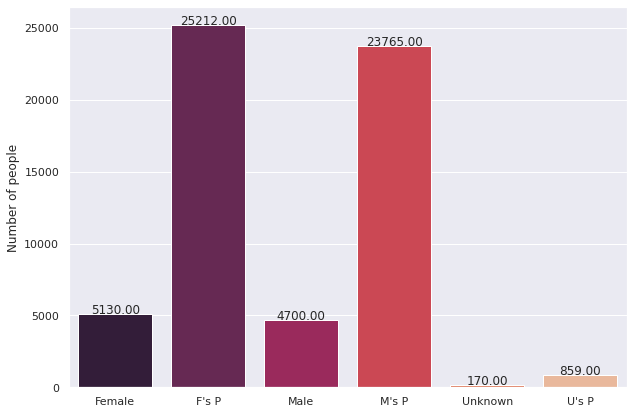

In [351]:
bike = [0,0,0]
bike[0] += pd.to_numeric(NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'Female']).sum() + pd.to_numeric(NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'F']).sum()
bike[1] += pd.to_numeric(NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'Male']).sum() + pd.to_numeric(NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'M']).sum()
bike[2] += pd.to_numeric(NewCustomerList['past_3_years_bike_related_purchases'][NewCustomerList['gender'] == 'U']).sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]


x = np.arange(6)

# Set the figure size
plt.figure(figsize=(10, 7))
plt.ylabel('Number of people')
# plot a bar chart
ax=sns.barplot(
    x=x,
    y=graphl,
    data=NewCustomerList, 
    palette="rocket");

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))
plt.show()

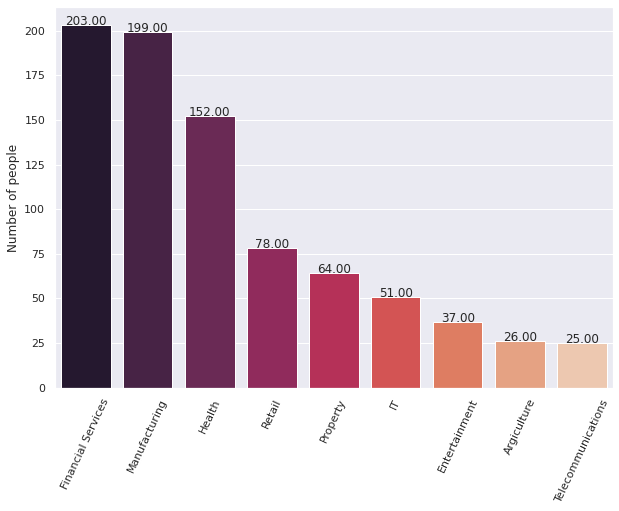

In [345]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax=sns.barplot(
    x=NewCustomerList.job_industry_category.value_counts().index,
    y=NewCustomerList.job_industry_category.value_counts(),
    data=NewCustomerList, 
    palette="rocket");

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")

plt.ylabel('Number of people')
plt.xticks(rotation=65)

plt.show()

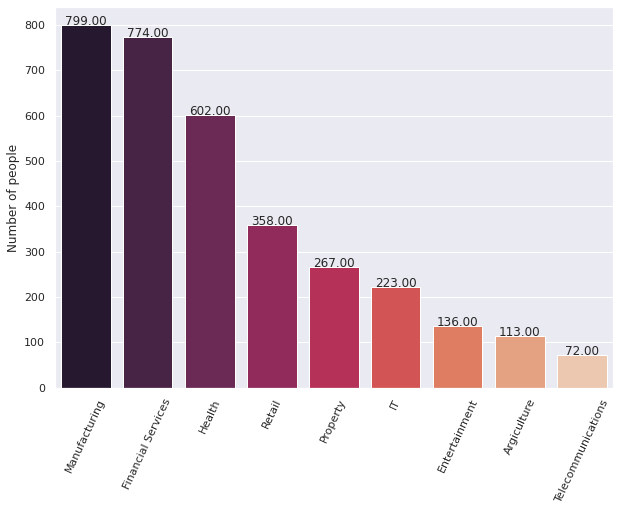

In [492]:

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax=sns.barplot(
    x=CustomerDemographic.job_industry_category.value_counts().index,
    y=CustomerDemographic.job_industry_category.value_counts(),
    data=CustomerDemographic, 
    palette="rocket");

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center")

plt.ylabel('Number of people')
plt.xticks(rotation=65)

plt.show()